In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [45]:
oppo=pd.read_excel('OppoMalaysia_Raw_File.xlsx')
oppo.head()

,Unnamed: 0,_id,is_hidden,privacy,type,message,attachments,created_time,link,full_picture,...,detect_lang,updated_at,inserted_at,non_video_interactions,page_type,video_views,story,description,shared_video_views,caption
0,0,5d7e365e25544850f016770c,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,The new OPPO A9 2020 is packed with a 5000mAh ...,{'data': [{'description': 'The new OPPO A9 202...,2019-09-15T04:00:02+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,{'en': 0.999997494409061},2020-07-29 07:04:32.948,2019-09-15 13:02:05.851,8417.0,fb,NaN,NaN,NaN,NaN,NaN
1,1,5d7e365e25544850f016770d,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,Happy Malaysia Day to all the Malaysian!\n\nTo...,{'data': [{'description': 'Happy Malaysia Day ...,2019-09-14T16:00:14+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,{'en': 0.9999970661097453},2020-07-29 07:04:32.949,2019-09-15 13:02:05.859,205.0,fb,NaN,NaN,NaN,NaN,NaN
2,2,5d7f89def4876cb96acec9ec,False,"{'allow': '', 'deny': '', 'description': '', '...",video,We are getting nearer to the launch of OPPO A9...,"{'data': [{'media': {'image': {'height': 405, ...",2019-09-16T04:00:01+0000,https://www.facebook.com/malaysiaoppo/videos/4...,https://scontent-sin6-1.xx.fbcdn.net/v/t15.525...,...,{'en': 0.9999972282207241},2020-07-29 07:04:44.342,2019-09-16 13:10:31.175,537.0,fb,86662.0,NaN,NaN,NaN,NaN
3,3,5d80d965d042fc80c7aea64b,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,1 day to go! Tomorrow is the day of OPPO A9 20...,"{'data': [{'description': ""1 day to go! Tomorr...",2019-09-17T04:00:04+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,"{'en': 0.8571397188979755, 'so': 0.14285793835...",2020-07-29 07:04:59.673,2019-09-17 13:02:01.379,1041.0,fb,NaN,NaN,NaN,NaN,NaN
4,4,5d822e6ae2d73965aea587a4,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,Meet the brand new OPPO A9 2020 priced at RM11...,{'data': [{'description': 'Meet the brand new ...,2019-09-18T07:15:51+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,{'en': 0.9999967074779028},2020-07-29 07:05:26.091,2019-09-18 13:16:28.517,16105.0,fb,NaN,NaN,NaN,NaN,NaN


<b>Data processing</b>
1. Replacing null values with 0
2. Adding up non video interactions, video views(if available), and shared video views(if available), into a new column called total interactions
3. Use min max scaler to normalize the data

In [46]:
def replaceNull(oppo):
    # FILL IN 0 TO REPLACE NULL VALUES
    oppo['non_video_interactions']=oppo['non_video_interactions'].fillna(0)
    oppo['video_views']=oppo['video_views'].fillna(0)
    oppo['shared_video_views']=oppo['shared_video_views'].fillna(0)
    oppo['total_interactions']=0
    return oppo

def minMaxScale(oppo):
    # USE MIN MAX SCALER TO NORMALIZE THE DATA INTO BETWEEN 0 AND 1
    for x in range(len(oppo)):
        oppo['total_interactions'].iloc[x]=oppo['non_video_interactions'].iloc[x]+oppo['video_views'].iloc[x]+oppo['shared_video_views'].iloc[x]
    scaler=MinMaxScaler()
    scaler.fit(oppo[['total_interactions']])
    oppo['total_interactions']=scaler.transform(oppo[['total_interactions']])
    return oppo

oppo=replaceNull(oppo)
oppo=minMaxScale(oppo)
oppo

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Unnamed: 0,_id,is_hidden,privacy,type,message,attachments,created_time,link,full_picture,...,updated_at,inserted_at,non_video_interactions,page_type,video_views,story,description,shared_video_views,caption,total_interactions
0,0,5d7e365e25544850f016770c,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,The new OPPO A9 2020 is packed with a 5000mAh ...,{'data': [{'description': 'The new OPPO A9 202...,2019-09-15T04:00:02+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,2020-07-29 07:04:32.948,2019-09-15 13:02:05.851,8417.0,fb,0.0,NaN,NaN,0.0,NaN,0.001923
1,1,5d7e365e25544850f016770d,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,Happy Malaysia Day to all the Malaysian!\n\nTo...,{'data': [{'description': 'Happy Malaysia Day ...,2019-09-14T16:00:14+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,2020-07-29 07:04:32.949,2019-09-15 13:02:05.859,205.0,fb,0.0,NaN,NaN,0.0,NaN,0.000047
2,2,5d7f89def4876cb96acec9ec,False,"{'allow': '', 'deny': '', 'description': '', '...",video,We are getting nearer to the launch of OPPO A9...,"{'data': [{'media': {'image': {'height': 405, ...",2019-09-16T04:00:01+0000,https://www.facebook.com/malaysiaoppo/videos/4...,https://scontent-sin6-1.xx.fbcdn.net/v/t15.525...,...,2020-07-29 07:04:44.342,2019-09-16 13:10:31.175,537.0,fb,86662.0,NaN,NaN,0.0,NaN,0.019922
3,3,5d80d965d042fc80c7aea64b,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,1 day to go! Tomorrow is the day of OPPO A9 20...,"{'data': [{'description': ""1 day to go! Tomorr...",2019-09-17T04:00:04+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,2020-07-29 07:04:59.673,2019-09-17 13:02:01.379,1041.0,fb,0.0,NaN,NaN,0.0,NaN,0.000238
4,4,5d822e6ae2d73965aea587a4,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,Meet the brand new OPPO A9 2020 priced at RM11...,{'data': [{'description': 'Meet the brand new ...,2019-09-18T07:15:51+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,2020-07-29 07:05:26.091,2019-09-18 13:16:28.517,16105.0,fb,0.0,NaN,NaN,0.0,NaN,0.003679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,957,5f5f1721a8fe385bcd541a92,False,"{'allow': '', 'deny': '', 'description': '', '...",video,Unboxing the OPPO Reno4 Pro Galactic Blue x Pe...,"{'data': [{'media': {'image': {'height': 405, ...",2020-09-13T07:00:03+0000,https://www.facebook.com/malaysiaoppo/videos/6...,https://scontent-sin6-2.xx.fbcdn.net/v/t15.525...,...,2020-09-14 07:04:00.481,2020-09-14 07:04:00.483,0.0,fb,228708.0,NaN,NaN,0.0,Unboxing the OPPO Reno4 Pro Galactic Blue x Pe...,0.052251
958,958,5f5f1721a8fe385bcd541a93,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,Stay stylish and fashionable just like Elizabe...,"{'data': [{'media': {'image': {'height': 720, ...",2020-09-13T04:00:03+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-1.xx.fbcdn.net/v/t1.0-9/...,...,2020-09-14 07:04:00.489,2020-09-14 07:04:00.490,0.0,fb,0.0,NaN,Stay stylish and fashionable just like Elizabe...,0.0,NaN,0.000000
959,959,5f5f1721a8fe385bcd541a94,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,Feel the speed of the newly launch OPPO A53 in...,"{'data': [{'media': {'image': {'height': 720, ...",2020-09-12T11:00:03+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-1.xx.fbcdn.net/v/t1.0-9/...,...,2020-09-14 07:04:00.493,2020-09-14 07:04:00.494,0.0,fb,0.0,NaN,Feel the speed of the newly launch OPPO A53 in...,0.0,NaN,0.000000
960,960,5f5f1721a8fe385bcd541a95,False,"{'allow': '', 'deny': '', 'description': '', '...",status,Let's take a look on Yvonne 蔡怡汶's Creative Vid...,"{'data': [{'media_type': 'link', 'description'...",2020-09-12T09:06:58+0000,NaN,NaN,...,2020-09-14 07:04:

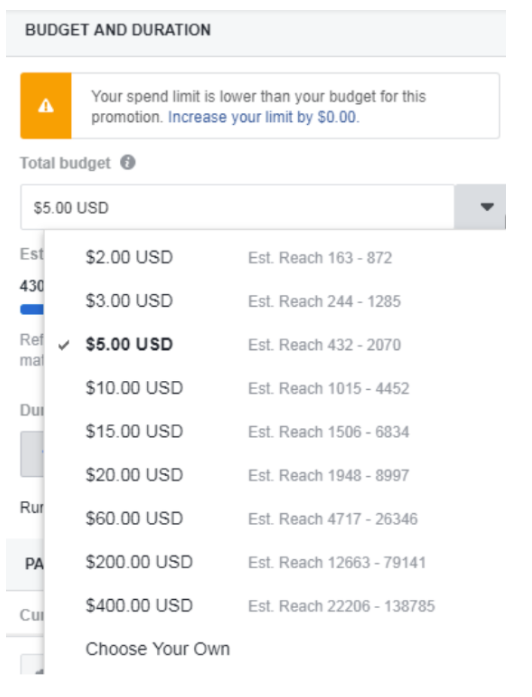

<h4>KMeans algorithm predicting classes based on number of interactions</h4><br/>
1. The KMeans algorithm will cluster each row into one of 10 different classes.<br/>
2. Number of cluster = 10 is chosen as first cluster means is not boost ads, while other 9 classes are by referring to the picture above, we had 9 different sets of price as higher price means reaching out to more customers<br/>
3. Picture origin => Social Media Marketing & Management Dashboard. 2018. The Facebook Boost Post Button: How to Use it and Get Results. [online] Available at: https://blog.hootsuite.com/how-does-facebook-boost-posts-work/ [Accessed 1 March 2021].

In [47]:
def Kmeans(oppo):
    km=KMeans(n_clusters=10)
    ypred=km.fit_predict(oppo[['total_interactions']])
    oppo['boost']=ypred
    return oppo

oppo=Kmeans(oppo)
oppo

,Unnamed: 0,_id,is_hidden,privacy,type,message,attachments,created_time,link,full_picture,...,inserted_at,non_video_interactions,page_type,video_views,story,description,shared_video_views,caption,total_interactions,boost
0,0,5d7e365e25544850f016770c,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,The new OPPO A9 2020 is packed with a 5000mAh ...,{'data': [{'description': 'The new OPPO A9 202...,2019-09-15T04:00:02+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,2019-09-15 13:02:05.851,8417.0,fb,0.0,NaN,NaN,0.0,NaN,0.001923,0
1,1,5d7e365e25544850f016770d,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,Happy Malaysia Day to all the Malaysian!\n\nTo...,{'data': [{'description': 'Happy Malaysia Day ...,2019-09-14T16:00:14+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,2019-09-15 13:02:05.859,205.0,fb,0.0,NaN,NaN,0.0,NaN,0.000047,0
2,2,5d7f89def4876cb96acec9ec,False,"{'allow': '', 'deny': '', 'description': '', '...",video,We are getting nearer to the launch of OPPO A9...,"{'data': [{'media': {'image': {'height': 405, ...",2019-09-16T04:00:01+0000,https://www.facebook.com/malaysiaoppo/videos/4...,https://scontent-sin6-1.xx.fbcdn.net/v/t15.525...,...,2019-09-16 13:10:31.175,537.0,fb,86662.0,NaN,NaN,0.0,NaN,0.019922,9
3,3,5d80d965d042fc80c7aea64b,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,1 day to go! Tomorrow is the day of OPPO A9 20...,"{'data': [{'description': ""1 day to go! Tomorr...",2019-09-17T04:00:04+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,2019-09-17 13:02:01.379,1041.0,fb,0.0,NaN,NaN,0.0,NaN,0.000238,0
4,4,5d822e6ae2d73965aea587a4,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,Meet the brand new OPPO A9 2020 priced at RM11...,{'data': [{'description': 'Meet the brand new ...,2019-09-18T07:15:51+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-2.xx.fbcdn.net/v/t1.0-9/...,...,2019-09-18 13:16:28.517,16105.0,fb,0.0,NaN,NaN,0.0,NaN,0.003679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,957,5f5f1721a8fe385bcd541a92,False,"{'allow': '', 'deny': '', 'description': '', '...",video,Unboxing the OPPO Reno4 Pro Galactic Blue x Pe...,"{'data': [{'media': {'image': {'height': 405, ...",2020-09-13T07:00:03+0000,https://www.facebook.com/malaysiaoppo/videos/6...,https://scontent-sin6-2.xx.fbcdn.net/v/t15.525...,...,2020-09-14 07:04:00.483,0.0,fb,228708.0,NaN,NaN,0.0,Unboxing the OPPO Reno4 Pro Galactic Blue x Pe...,0.052251,9
958,958,5f5f1721a8fe385bcd541a93,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,Stay stylish and fashionable just like Elizabe...,"{'data': [{'media': {'image': {'height': 720, ...",2020-09-13T04:00:03+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-1.xx.fbcdn.net/v/t1.0-9/...,...,2020-09-14 07:04:00.490,0.0,fb,0.0,NaN,Stay stylish and fashionable just like Elizabe...,0.0,NaN,0.000000,0
959,959,5f5f1721a8fe385bcd541a94,False,"{'allow': '', 'deny': '', 'description': '', '...",photo,Feel the speed of the newly launch OPPO A53 in...,"{'data': [{'media': {'image': {'height': 720, ...",2020-09-12T11:00:03+0000,https://www.facebook.com/malaysiaoppo/photos/a...,https://scontent-sin6-1.xx.fbcdn.net/v/t1.0-9/...,...,2020-09-14 07:04:00.494,0.0,fb,0.0,NaN,Feel the speed of the newly launch OPPO A53 in...,0.0,NaN,0.000000,0
960,960,5f5f1721a8fe385bcd541a95,False,"{'allow': '', 'deny': '', 'description': '', '...",status,Let's take a look on Yvonne 蔡怡汶's Creative Vid...,"{'data': [{'media_type': 'link', 'description'...",2020-09-12T09:06:58+0000,NaN,NaN,...,2020-09-14 07:04:00.524,0.0,fb,0.0,NaN,"When this happens, it's usually because the ow...",0.0,This content isn't available right now,0.000000,0


<b>Visualization of predicted class</b>

No handles with labels found to put in legend.


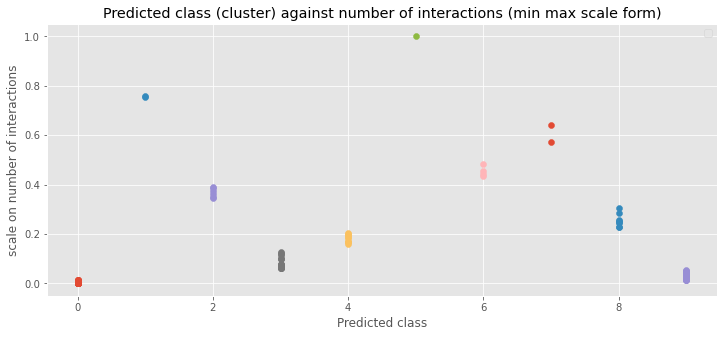

In [54]:
data0=oppo[oppo['boost']==0]
data1=oppo[oppo['boost']==1]
data2=oppo[oppo['boost']==2]
data3=oppo[oppo['boost']==3]
data4=oppo[oppo['boost']==4]
data5=oppo[oppo['boost']==5]
data6=oppo[oppo['boost']==6]
data7=oppo[oppo['boost']==7]
data8=oppo[oppo['boost']==8]
data9=oppo[oppo['boost']==9]

plt.figure(figsize=(12,5))
plt.scatter(data0['boost'],data0['total_interactions'])
plt.scatter(data1['boost'],data1['total_interactions'])
plt.scatter(data2['boost'],data2['total_interactions'])
plt.scatter(data3['boost'],data3['total_interactions'])
plt.scatter(data4['boost'],data4['total_interactions'])
plt.scatter(data5['boost'],data5['total_interactions'])
plt.scatter(data6['boost'],data6['total_interactions'])
plt.scatter(data7['boost'],data7['total_interactions'])
plt.scatter(data8['boost'],data8['total_interactions'])
plt.scatter(data9['boost'],data9['total_interactions'])
plt.xlabel('Predicted class')
plt.ylabel('scale on number of interactions')
plt.title('Predicted class (cluster) against number of interactions (min max scale form)')

plt.legend()

<b>Frequency of each predicted class</b>

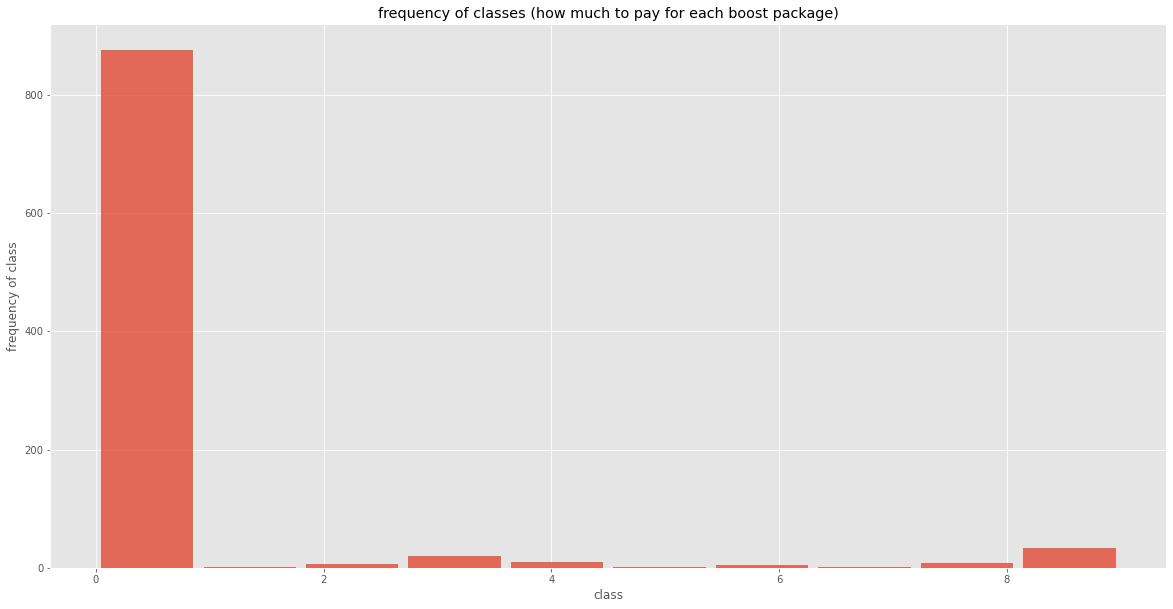

In [49]:
size=oppo['boost']
size=np.asarray(size)

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.hist(size,bins=10,alpha=0.8,rwidth=0.9)
plt.title('frequency of classes (how much to pay for each boost package)')
plt.xlabel('class')
plt.ylabel('frequency of class')
plt.show()

<b>Assigning price for each class</b><br/>
1. Calculate the average number of interactions for each predicted class and sort it in order<br/>
2. Assign the respective price for each class

In [50]:
# CALCULATE AVERAGE NUMBER OF INTERACTIONS FOR EACH CLASS PREDICTED BY KMEANS
def countAverageInteractionOfClass(oppo):
    totalInteractionGroups={}
    for y in range(10):
        pay=0
        for x in range(len(oppo)):
            if oppo['boost'].iloc[x]==y:
                pay+=oppo['total_interactions'].iloc[x]
        totalInteractionGroups[y]=pay/len(oppo[oppo['boost']==y])
    totalInteractionGroups=sorted(totalInteractionGroups.items(), key=lambda x:x[1])
    return totalInteractionGroups

def assignPrice(totalInteractionGroups):
    # ASSIGN THE PRICE OF BOOST POST FOR EACH CLASS PREDICTED BY KMEANS
    # PRICE REFERED FROM PICTURE ABOVE
    classPrice={}
    for x in range(10):
        if x==0:
            classPrice[totalInteractionGroups[x][0]]=0
        elif x==1:
            classPrice[totalInteractionGroups[x][0]]=2.0
        elif x==2:
            classPrice[totalInteractionGroups[x][0]]=3.0
        elif x==3:
            classPrice[totalInteractionGroups[x][0]]=5.0
        elif x==4:
            classPrice[totalInteractionGroups[x][0]]=10.0
        elif x==5:
            classPrice[totalInteractionGroups[x][0]]=15.0
        elif x==6:
            classPrice[totalInteractionGroups[x][0]]=20.0
        elif x==7:
            classPrice[totalInteractionGroups[x][0]]=60.0
        elif x==8:
            classPrice[totalInteractionGroups[x][0]]=200.0
        elif x==9:
            classPrice[totalInteractionGroups[x][0]]=400.0
    return classPrice

totalInteractionGroups=countAverageInteractionOfClass(oppo)
classPrice=assignPrice(totalInteractionGroups)
print('Average interaction for each class',totalInteractionGroups,'\n')
print('Price for each class: ',classPrice)
pd.DataFrame(classPrice.items(),columns=['class','amount to pay, $'])

Average interaction for each class [(0, 0.0005727990438569398), (9, 0.027221633563031367), (3, 0.08364074992666323), (4, 0.18196589843043587), (8, 0.25609634691533234), (2, 0.3687025957406495), (6, 0.4536375148843929), (7, 0.6075592154382796), (1, 0.7569073635593506), (5, 0.9999999999999999)] 

Price for each class:  {0: 0, 9: 2.0, 3: 3.0, 4: 5.0, 8: 10.0, 2: 15.0, 6: 20.0, 7: 60.0, 1: 200.0, 5: 400.0}


,class,"amount to pay, $"
0,0,0.0
1,9,2.0
2,3,3.0
3,4,5.0
4,8,10.0
5,2,15.0
6,6,20.0
7,7,60.0
8,1,200.0
9,5,400.0


<b>Calculate money spending on boost each month</b>

In [51]:
def countMonthlySpending(oppo):
    # CALCULATE MONEY SPEND EACH MONTH BY ADDING UP BOOST CLASSES(PREDICTED BY KMEANS) RESPECTIVE PRICE
    # for loop to list out all months
    monthlyAmount={}
    for x in range(len(oppo)):
        if oppo['created_time'][x][:7] not in monthlyAmount:
            monthlyAmount[oppo['created_time'][x][:7]]=0
            
    # for loop to count sum of money
    for x in range(len(oppo)):
        sum=monthlyAmount[oppo['created_time'][x][:7]]
        sum+=classPrice[oppo['boost'].iloc[x]]
        monthlyAmount[oppo['created_time'][x][:7]]=sum
        
    return monthlyAmount

monthlyAmount=countMonthlySpending(oppo)
monthlyAmount

{'2019-09': 10.0,
 '2019-10': 41.0,
 '2019-11': 17.0,
 '2019-12': 4.0,
 '2020-01': 6.0,
 '2020-02': 0,
 '2020-03': 275.0,
 '2020-04': 18.0,
 '2020-05': 41.0,
 '2020-06': 626.0,
 '2020-07': 137.0,
 '2020-08': 146.0,
 '2020-09': 22.0}

<b>Visualization of money spending estimation</b>

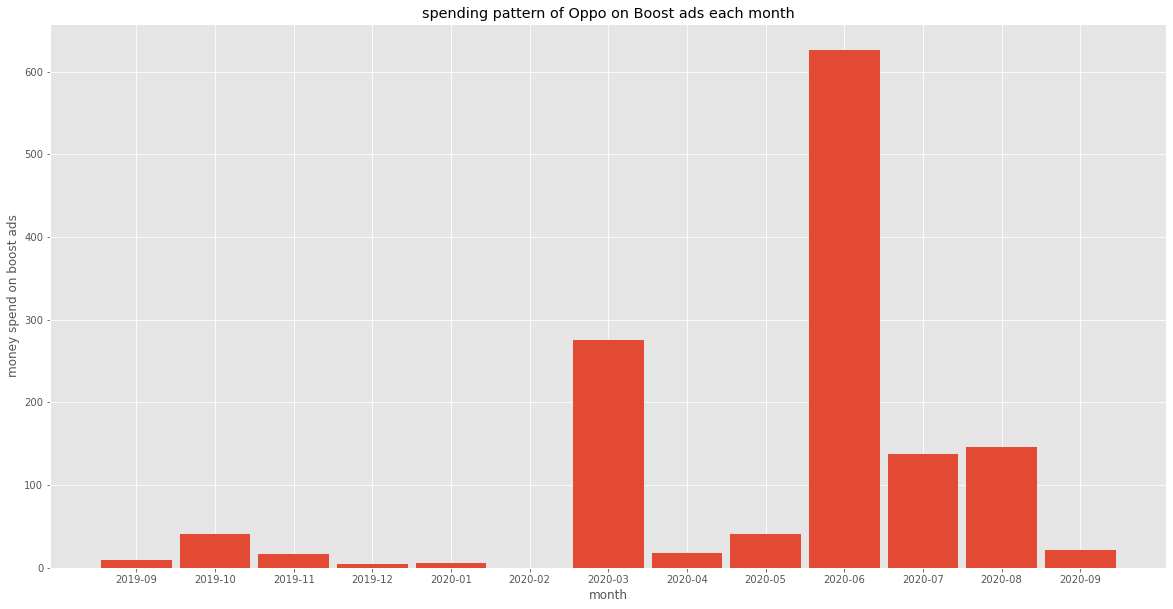

In [52]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.bar(monthlyAmount.keys(),monthlyAmount.values(),width=0.9)
plt.xlabel('month')
plt.ylabel('money spend on boost ads')
plt.title('spending pattern of Oppo on Boost ads each month')
plt.show()

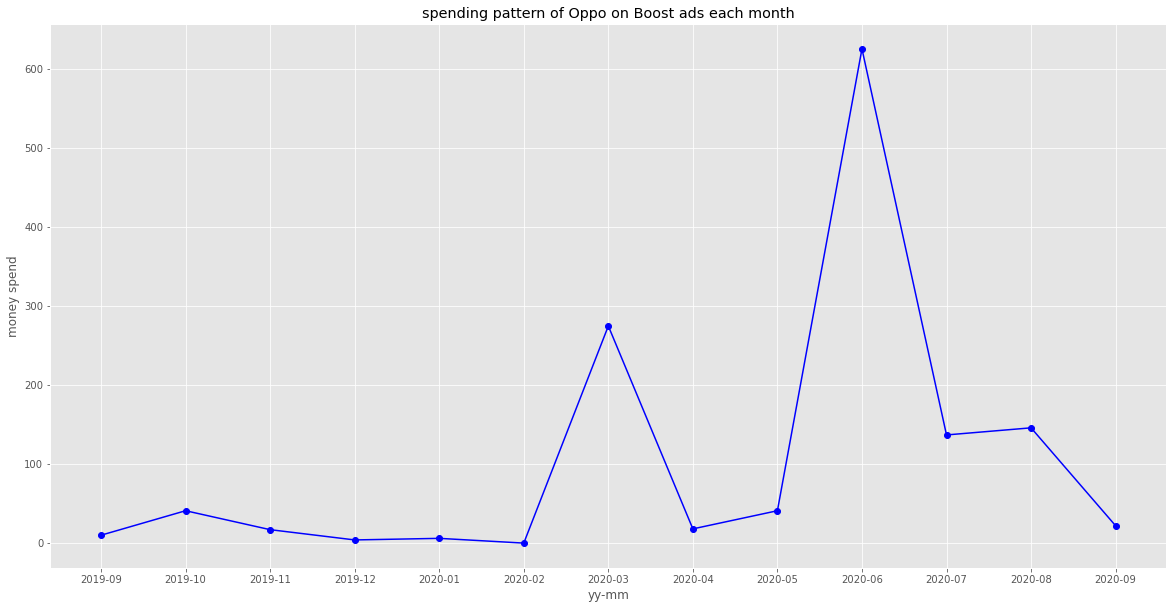

In [53]:
plt.figure(figsize=(20,10))
plt.plot(monthlyAmount.keys(),monthlyAmount.values(),marker='o',color='blue',)
plt.xlabel('yy-mm')
plt.ylabel('money spend')
plt.title('spending pattern of Oppo on Boost ads each month')
plt.grid(True)
plt.show()